# 深度学习在人脸识别中的应用

人脸识别的过程包括：

1. 人脸检测
2. 人脸对齐
3. 特征提取
4. 特征度量

其中，特征提取与度量，是人脸识别问题中的关键问题，也是相关研究的难点之一。

## 传统方法在人脸识别中的弱点

传统人脸识别方法，主要利用了手工特征对面部信息进行归纳提取，将人脸图像变换到新的空间进行辨识比对。

而实际场景中人脸的多样性(妆容、光照、角度、配饰、表情、年龄变化等)信息，导致了手工特征无法稳健地获取人脸识别的特征。

对此，传统方法的解决方案多为对图像进行预处理，包括去噪、白平衡、人脸对齐等等，但由于特征的表达能力较弱，因此性能较为受限。

## 人脸识别在深度学习中是一个什么问题？

首先，CNN的经典模型，如Resnet，VGG等，是一个典型的分类模型。

例如，手写数字识别问题中，共60000张训练图像，和10个类别。

用这些图像，将模型训练为一个十分类的问题。

然而，这种模型适合用于人脸识别吗？

**人脸识别在分类问题中的局限性**

在实际场景中，人脸识别往往不能作为一个分类问题看待。

其中主要原因是，我们很难为每个人都采集足够多的训练图像作为训练(可以用视频采集[1])

而且，即便我们为每个人都采集了大量的训练图像，也很难训练一个大规模的分类模型--因为类别太多了，特征空间太拥挤。

以CelebA为例，该数据集和mnist的对比如下

| 数据集 | mnist | CelebA |
| ---- | ---- | ---- |
| 类别 | 10   | 10,177   |
| 单类图像数量 | 6,000 |  |
|    单类图像数量最大        | 6,000 | 73 |
| 单类图像数量最小 | 6,000 | 2 |

显然，这样的数据集不足以支撑我们用分类模型训练一个分类器。

**实际场景中的人脸识别问题**

实际场景中的人脸识别，通常有两个场景

1. 人脸验证, 1v1, 手机解锁
2. 人脸识别, 1vN, 打卡签到

无论哪个场景，都需要进行一个步骤，即人脸的两两匹配。

因此，归根结底，人脸识别都是一个特征匹配的问题。

而我们需要准确的提取人脸图像的特征，令其类内距离尽可能地小，类间距离尽可能地大。

问题在于：在无法充分训练CNN的前提下，如何利用它得到一个精确的特征提取器？



## 人脸识别在深度学习中的第一个里程碑--DeepFace[2]

deepface是2014年facebook出品，首次在人脸识别领域中取得了超越人类的性能。

**模型结构**

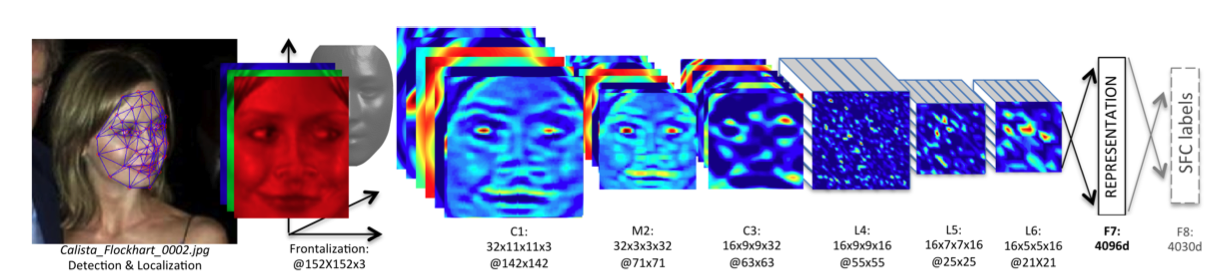

该工作具有典型的早期CNN的研究风格，采用分类的思路来训练模型

使用的数据集为SFC(social face classification)，共440万张图像，4030个类别，每个人都有800至1200张图像。

这样的数据集足够训练一个CNN模型(一百万级参数)

**人脸对齐**

除了训练模型之外，他还采用了人脸对齐的方案，具体过程如下：

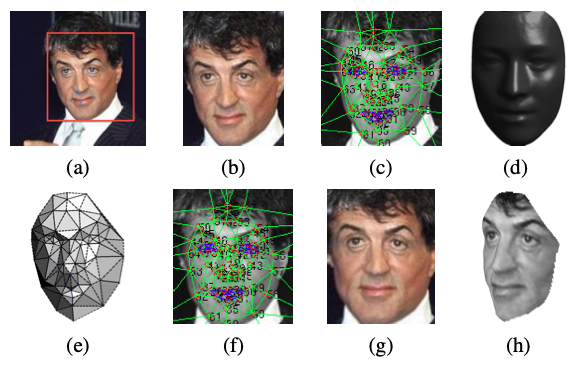


**Step1.** 人脸检测

采用LBP+SVR来检测出人脸。其中，SVR是一种回归算法，通过LBP特征的输入，来训练一个SVR模型，用于估计人脸检测结果。

其中SVR的原理与SVM大致相同，优化思想都是离超平面最近的点到该超平面的距离最大。

不同的在于，SVR是一个回归模型，优化目标额外增加了超平面与数据之间的误差最小

**Step2.** 人脸对齐

* 迭代6个点

先对上述求得的六个基准点进行迭代，找到精确的六个点

* 找到67个点

使用第二个SVR，定位出人脸的67个基准点

* 基于67个点，进行Delaunay三角化进行编号

具体来说，给定一个点集，Delaunay三角剖分算法会生成一个相应的三角形网格，其中每个三角形的外接圆内不包含任何点。

* 人脸3d映射

编号后，通过一个平均3d人脸，得到一个当前人脸对于3D人脸的映射，并根据三角剖分获得3d人脸三角网

* 角度偏转

将3d人脸三角网偏转至正面，以获得正向人脸。最终降维到2d空间，得到人脸正视图。



**人脸验证**

针对人脸验证场景，输入两个实例，判断他们是否为同一个人。

其中，采用无监督的方式，就可以直接对提取到的特征做内积。

这种方法也是CNN早期作为特征提取器使用的主要方式之一。

而有监督的方式则是可采用训练的方式，将特征映射到新的空间，让**类间距离变大，类内距离变小**

具体论文中，提到了两种方式：

1. 卡方相似度

$$\chi^2(f_1, f_2)=\sum_i w_i\frac{(f_1 - f_2)^2}{f_1 + f_2}$$

上述公式利用卡方分布，构建了一个分类器：给定特征$f_1, f2$, 分类器会输出一个分类值。

用SVM训练得到$w_i$，如果输出正例，则为同类。

2. 孪生网络

上述模型两路参数共享，将输出的特征映射为一个逻辑单元

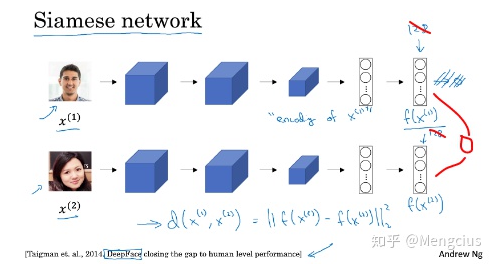

**实验结果**

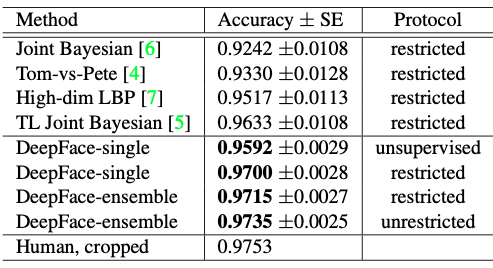

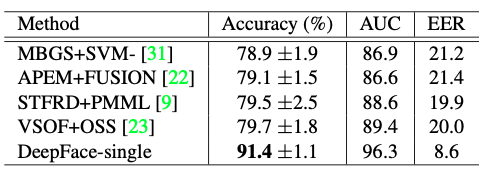

## 现代人脸识别研究的主要趋势

现代人脸识别问题，主要的核心在于如何将不同的人脸，在特征空间中有效区分开来。

例如，利用siamese network，就是一种典型的度量学习策略。

这种度量学习，通常采用对比损失作为损失函数，其目标是判断输入的两个实例，是/不是一类。

**虽然这种方式能够将类间距离加大，但对于类内距离的减小，作用有限。**

对此，人们又提出了三元组损失。

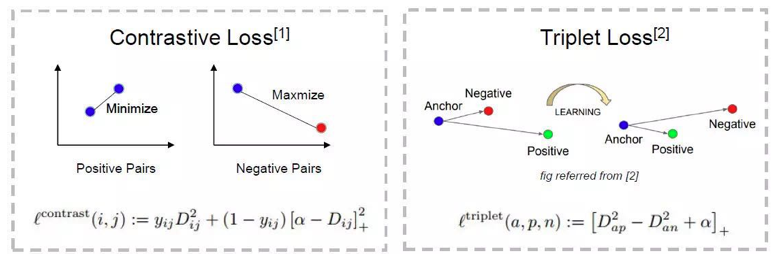

三元组损失函数可以在加大类间距离的同时，拉近类内距离。因此，获得了较好的结果[3]。

在google提出的FaceNet中，人脸识别的准确率在LFW上，达到了98.87/%， 如果使用了额外的对齐手段，准确率还能继续提升一个点。

然而，加入三元组损失的问题在于模型训练成本增加。

解决方案包括：先用常规训练得到基本模型，然后再用三元组进行fine tuning，或者是改变simple的方式，把一些较难辨识的类别特殊处理等等。

#### 参考文献

1. Zhou, Erjin, Zhimin Cao, and Qi Yin. "Naive-deep face recognition: Touching the limit of LFW benchmark or not?." arXiv preprint arXiv:1501.04690 (2015).
2. 
3. Schroff, Florian, Dmitry Kalenichenko, and James Philbin. "Facenet: A unified embedding for face recognition and clustering." Proceedings of the IEEE conference on computer vision and pattern recognition. 2015.


**备注：deepface经过多年迭代，已经可以实现多种人脸相关的内容，并且封装成了成熟的工具。**[地址](https://github.com/serengil/deepface)

* * *

## 另一种优化人脸识别的思路--SphereFace

人脸识别模型的本质是，**令类内最大距离小于类间最小距离**

之前的思路都是采用各种优化训练方法，比如siamese，tripplet等。

而sphereface则采用了一种不同的思路：“通过更加严苛的分类损失，来得到更加泛化的模型，从而获取更加discrimintive的embeding”

### A-softmax

sphereface认为，训练人脸的最终目的是要令类内距离小于与其他类间的距离。

而已有模型不能做到的原因之一，是因为softmax分类能力不够强力。

也就是说，他不能将同类样本充分聚合，只是粗略地用一个平面划分样本


**softmax回顾**

给定一个向量$z$, softmax函数可以写为

$$\delta(z_j)=\frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

对softmax向量求损失，则有

$$Loss(z, y)=\sum_{k=1}^K -y_k\log(\delta(z_k))$$

由于$y$是一个one-hot向量，则可简写为

$$Loss(z, y)=-log(\delta(z_i))$$
$$s.t. i=\arg\max(y)$$

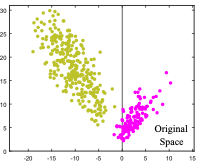

上述过程中，通过一个分界平面将两类数据区分开来。


上述的softmax损失中，确定的分类平面并未对类间距离进行约束，因此，达不到预期效果。

例如，在一个二分类平面上，$W=[W_1, W_2], b=[b_1, b_2]$

任意一个样本x的后验概率为

第1类：$p_1 = \frac{W_1x + b_1}{Wx+b}$

第2类：$p_2 = \frac{W_2x + b_2}{Wx+b}$

那么可以得到分界平面的公式为一条直线。

$$(W_1 - W_2)x + (b_1 - b_2) = 0$$

可以看出，他只是要求了类间不存在重叠，而并没有要求类间的距离足够大。

如何解决？

**modified softmax**

$$z_j=W_jx+b_j$$

带入softmax

$$Loss(z_i, y_i)=-\log\frac{e^{W_ix+b_i}}{\sum_{k=1}^K e^{W_kx+b_k}}$$

根据线性代数知识，向量的内积等于向量的模与余弦夹角的乘积

$$W_ix+b_i \rightarrow ||W_i||\cdot||x||\cos(\theta_i) + b_i$$

这里我们将$W_i$进行归一化，令$||W_i||=1, b_i=0$, 有

$$Loss(z_i, y_i)=-\log\frac{e^{||x||\cdot\cos(\theta_i)}}{\sum_{k=1}^K e^{||x||\cdot\cos(\theta_k)}}$$

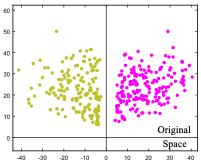

此图中，是引入了角度信息的softmax，但并未对特征空间进行归一化。给定一个角度，以及偏置b，就可以得到一个分界平面

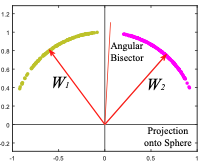

此图中，通过对特征空间进行归一化，可以得到一个分界平面。

相比较于传统的softmax，这个方法能够将不同类的数据较好的分开。

但是，依然没有达到，类间距离大于全部类内距离。

此时，以二分类为例，分界平面为

$$\cos(\theta_1) - \cos(\theta_2) = 0$$

他可以通过角度约束获得比平面约束更好的平面，但依然无法解决类内距离小于所有类间距离的目的。

**A-softmax**

在modified softmax中，

* 当$\cos(\theta_1) > \cos(\theta_2)$时，x属于第一类;
* 当$\cos(\theta_1) < \cos(\theta_2)$时，x属于第二类;

显然，两个类别共享一个分界平面。

因此，两个类别的边界只有"一墙之隔"。

如何将类别边界的“无人区”扩大？

定义两个决策面：

* 决策面1: $\cos(m\theta_1) - \cos(\theta_2) = 0$
* 决策面2: $\cos(\theta_1) - \cos(m\theta_2) = 0$

其中，$m$是一个整数，且大于等于2.

当$m=1$时，与modified softmax无异。

当$m\geq2$时: 只有分界平面比原先的分界平面之间有$m$倍的差距，才可以正确分类。

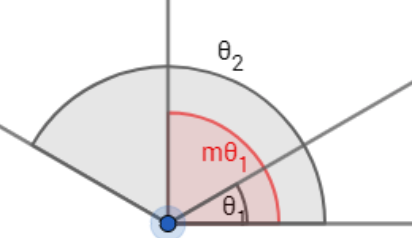


上述过程写到公式中，有

$$Loss(z, y)=\frac{1}{N}\sum_{i}-\log\frac{e^{||x||\cdot\cos(m\theta_i)}}{\sum_{k=1}^K e^{||x||\cdot\cos(m\theta_k)}}$$

那么上述过程，仍然存在一个问题：*乘以m后，角度范围超越了180度*

解决方案：用一系列余弦方程代替原角度方程。

定义:

$$\phi(\theta_i)=(-1)^k\cos(m\theta_i)-2k$$

其中, $\theta_i\in[\frac{k\pi}{m}, \frac{(k+1)\pi}{m}]$, 且$k\in[1, m-1]$

将$\phi(\theta_i)$带入公式，即可得到A-softmax的完整形式


$$Loss(z, y)=\frac{1}{N}\sum_{i}-\log\frac{e^{||x||\cdot\phi(\theta_i)}}{\sum_{k=1}^K e^{||x||\cdot\phi(\theta_i)}}$$

这种方法可以为类之间的“无人区”构建一个很宽的地带(宽度由m决定)，称之为margin。

论文中展示了在测试数据上的情况如下：

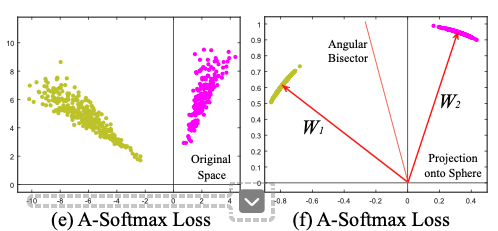

**拓展** m的取值对于训练的难度和最终的效果至关重要。

当m较小的时候，与普通方法无异；

当m较大的时候，每个类别的内部数据被压缩的很小。但由于噪声误差的存在，导致训练难以进行。

论文通过严格的数学证明，得到结论为：

* 在二分类下，当$m\geq 2+\sqrt3$时，类间的距离大于类内距离
* 在多分类的情况下，$m\geq 3$能保证类间的距离大与类内的距离

论文实际测试取的4.




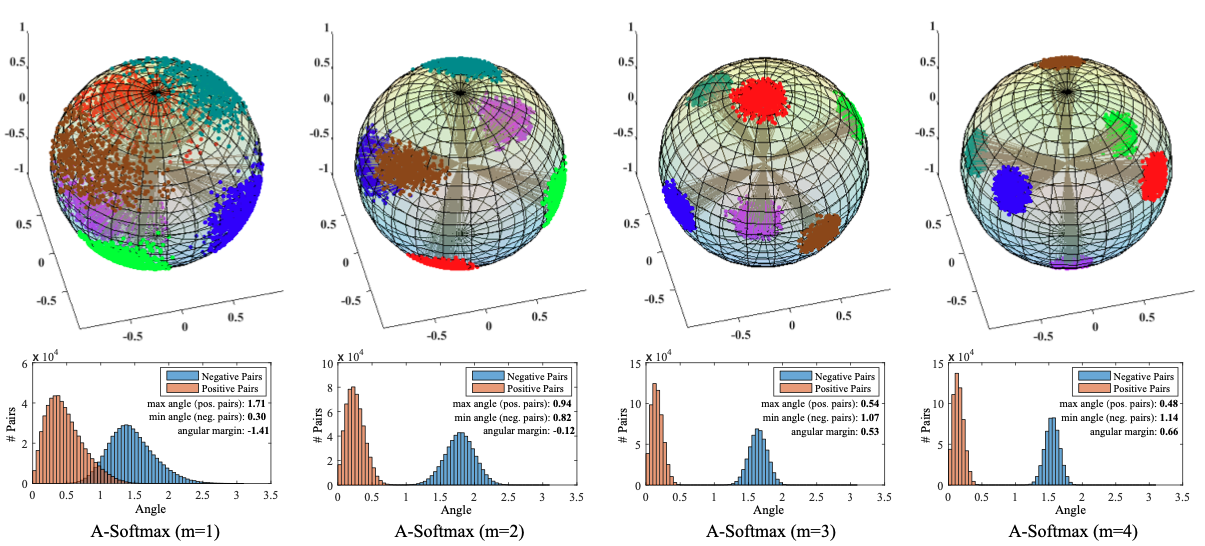

关于A-softmax的直观解释：

每个样本点都是在球面上的映射；

训练时，每次迭代都是一个“鱼找鱼虾找虾”的场景：即同类会慢慢的聚集，从而不同类也会慢慢离散；

然而，如果不对类间距离加以特殊限制，则会导致聚集不够彻底，弥散的类别存在相互重叠的情况；

因此，m可以认为是一个控制聚集程度的参数：参数越大，导致聚集越彻底，因此和其他类的间隙也就越大。

### 后续的其他工作思路

#### cosface

该工作也从softmax入手，归一化参数后，得到

$$Loss=\frac{1}{N}\sum_i-\log\frac{e^{s\cos(\theta_i)}}{\sum_je^{s\cos(\theta_j)}}$$

进一步地，引入常数margin，区别于sphereFace，这里的损失函数为

$$Loss=\frac{1}{N}\sum_i-\log\frac{e^{s\cos(\theta_i) - m}}{\sum_je^{s\cos(\theta_j) - m}+ \sum_{j\neq y_i}e^{s\cos(\theta_j) - m}}$$

这么做的本质是什么？

我们知道sphereface里，采用了

$$\cos(m\theta_1) - \cos(\theta_2) > 0$$ 比较正负的策略

那么还能怎么改进？

$$\cos(\theta_1) - \cos(\theta_2) > m$$

这个就是cosface的精髓。

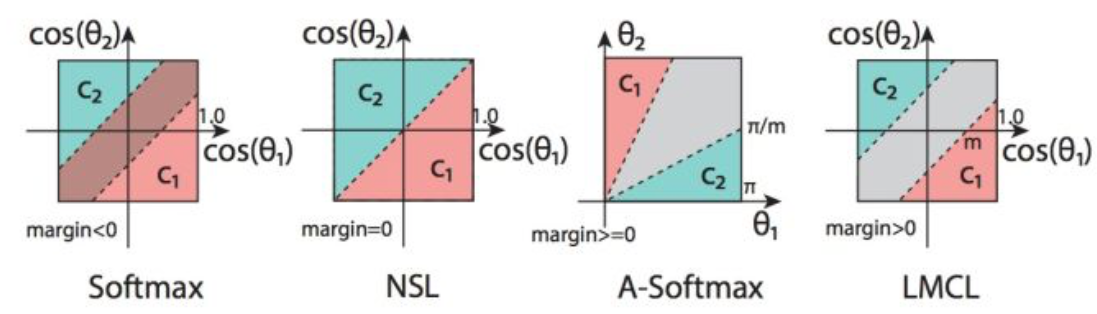

#### arcface

那么还能怎么改？

$$\cos(\theta_1 + m) - \cos(\theta_2) > 0$$

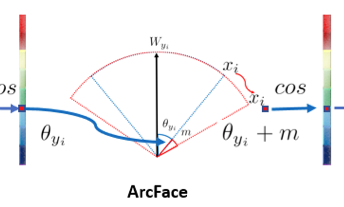

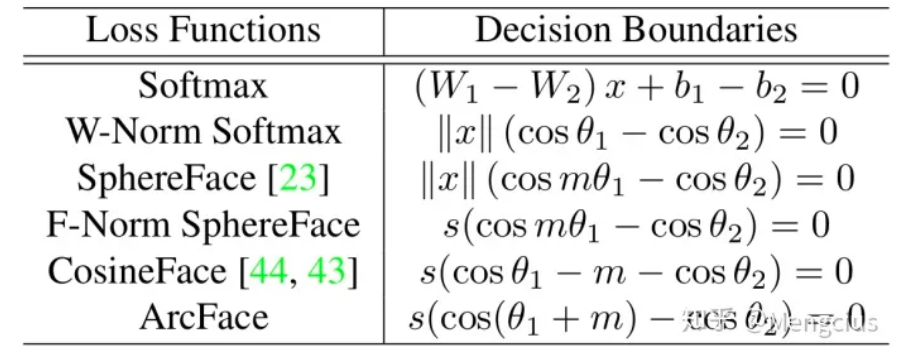